# MODELO SUPERVISADO 

In [168]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats
import re
import heapq
import matplotlib.cm as cm
import os
from sklearn.model_selection import train_test_split

In [237]:
# Se importa el dataset final (CSV) y se visualiza
peliculas5=pd.read_csv(r'..\\datasets\\peliculas_final.csv')
peliculas5

,show_id,titulo,director,elenco,anio,clasificacion,duracion,plataforma,genero,codireccion,elenco_oscar,elenco_gg,punt_media
0,as2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,amazon,Drama,0,0,0,3.548682
1,as17,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,amazon,Horror,0,0,0,3.498984
2,as20,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,amazon,Science Fiction,0,0,0,3.586777
3,as23,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR/Sin clasificacion,62,amazon,Arts,0,0,0,3.594092
4,as25,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,amazon,Drama,0,0,0,3.552846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,ds1446,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108,disney,Action-Adventure,0,0,0,3.477035
13022,ds1447,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106,disney,Action-Adventure,0,0,0,3.492537
13023,ds1448,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107,disney,Biographical,0,0,0,3.558522
13024,ds1449,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112,disney,Buddy,0,0,0,3.628409


In [170]:
# Se eliminan los valores que no sean numéricos.peliculas5[
peliculas5['show_id'] = peliculas5['show_id'].str.replace(r'\D', '', regex=True)

# Ver las primeras filas del DataFrame resultante
print(peliculas5.head())

  show_id                titulo       director  \
0       2  Take Care Good Night   Girish Joshi   
1      17              Zoombies   Glenn Miller   
2      20                   Zoe  Drake Doremus   
3      23          Zis Boom Bah   William Nigh   
4      25              Zandalee  Sam Pillsbury   

                                              elenco  anio  \
0   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar  2018   
1         Marcus Anderson, Kaiwi Lyman, Andrew Asper  2016   
2  Ewan McGregor, Léa Seydoux, Theo James, Mirand...  2018   
3                            Grace Hayes, Mary Healy  1941   
4  Nicolas Cage, Judge Reinhold, Erika Anderson, ...  1991   

          clasificacion  duracion plataforma           genero  codireccion  \
0                   13+       110     amazon            Drama            0   
1                   13+        87     amazon           Horror            0   
2                     R       104     amazon  Science Fiction            0   
3  NR/Sin clas

In [234]:
 ###Necesito un código que me revise si tengo valores que no sean numéricos en mi dataset peliculas5 ya que me tira un error, por presencia de letras

### Objetivo: Determinar si la película será exitosa


In [171]:
peliculas5['pel_exitosa']=peliculas5['punt_media'].apply(lambda x: 0 if x < 3.5 else 1)

In [172]:
# Se crean las variables dummies
dum_supervisado = pd.get_dummies(peliculas5, columns=['plataforma', 'clasificacion'])

In [173]:
# Se eliminan aquellas variables que no se vana a incluir en el modelo.
dum_supervisado1= dum_supervisado.drop(['titulo', 'director', 'elenco', 'anio', 'duracion', 'genero'], axis=1)
dum_supervisado1

,show_id,codireccion,elenco_oscar,elenco_gg,punt_media,pel_exitosa,plataforma_amazon,plataforma_disney,plataforma_netflix,clasificacion_13+,...,clasificacion_PG-13,clasificacion_R,clasificacion_TV-14,clasificacion_TV-G,clasificacion_TV-MA,clasificacion_TV-PG,clasificacion_TV-Y,clasificacion_TV-Y7,clasificacion_TV-Y7-FV,clasificacion_UR/No clasificado
0,2,0,0,0,3.548682,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,17,0,0,0,3.498984,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,3.586777,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,23,0,0,0,3.594092,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,3.552846,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,1446,0,0,0,3.477035,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
13022,1447,0,0,0,3.492537,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13023,1448,0,0,0,3.558522,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
13024,1449,0,0,0,3.628409,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [174]:
# Se guarada el dataset a csv
dum_supervisado1.to_csv(r'..\datasets\supervisado.csv', index=False)

In [175]:
# Se importa el dataset y se visualiza
supervisado=pd.read_csv(r'..\\datasets\\supervisado.csv')
supervisado

,show_id,codireccion,elenco_oscar,elenco_gg,punt_media,pel_exitosa,plataforma_amazon,plataforma_disney,plataforma_netflix,clasificacion_13+,...,clasificacion_PG-13,clasificacion_R,clasificacion_TV-14,clasificacion_TV-G,clasificacion_TV-MA,clasificacion_TV-PG,clasificacion_TV-Y,clasificacion_TV-Y7,clasificacion_TV-Y7-FV,clasificacion_UR/No clasificado
0,2,0,0,0,3.548682,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,17,0,0,0,3.498984,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,3.586777,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,23,0,0,0,3.594092,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,3.552846,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,1446,0,0,0,3.477035,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
13022,1447,0,0,0,3.492537,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13023,1448,0,0,0,3.558522,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
13024,1449,0,0,0,3.628409,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [176]:
# Se eliminan aquellas variables que no se vana a incluir en el modelo y se las guardo en x. 
x= supervisado.drop(['punt_media'], axis=1)
x.head()

,show_id,codireccion,elenco_oscar,elenco_gg,pel_exitosa,plataforma_amazon,plataforma_disney,plataforma_netflix,clasificacion_13+,clasificacion_16+,...,clasificacion_PG-13,clasificacion_R,clasificacion_TV-14,clasificacion_TV-G,clasificacion_TV-MA,clasificacion_TV-PG,clasificacion_TV-Y,clasificacion_TV-Y7,clasificacion_TV-Y7-FV,clasificacion_UR/No clasificado
0,2,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,17,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,23,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [177]:
lista_atributos = x.columns

In [178]:
# Ahora selecciono las etiquetas y las guardo en y.
y = supervisado['punt_media']

In [179]:
x, y = np.array(x), np.array(y)

In [180]:
x      

array([[   2,    0,    0, ...,    0,    0,    0],
       [  17,    0,    0, ...,    0,    0,    0],
       [  20,    0,    0, ...,    0,    0,    0],
       ...,
       [1448,    0,    0, ...,    0,    0,    0],
       [1449,    0,    0, ...,    0,    0,    0],
       [1450,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [181]:
y[:4]   # En este caso es el punt_media

array([3.54868154, 3.49898374, 3.58677686, 3.5940919 ])

### Separando Train / Test 

In [182]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [183]:
x.shape # Se observan la cantidad de filas y columnas 

(13026, 27)

In [184]:
X_train.shape # 10420 seran de entrenamiento 

(10420, 27)

In [185]:
X_test.shape  # 2606 serán de evaluación 

(2606, 27)

In [186]:
X_test

array([[1975,    0,    0, ...,    0,    0,    0],
       [3018,    0,    0, ...,    0,    0,    0],
       [6108,    1,    0, ...,    0,    0,    0],
       ...,
       [4347,    0,    0, ...,    0,    0,    0],
       [7852,    0,    0, ...,    0,    0,    0],
       [4611,    0,    0, ...,    0,    0,    0]], dtype=int64)

### Random Forest

In [187]:
# Se importan las librerías
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [188]:
# Se inicia el modelo
regresor = RandomForestRegressor(criterion='squared_error', random_state=42)

In [189]:
# Se entrena el modelo
regresor.fit(X_train, y_train);

In [190]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [191]:
# Se predicen los valores para el set de testeo
y_pred = regresor.predict(X_test)

In [192]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred)

0.029510136076337692

### Support Vector Machine

In [193]:
#Se importan librerías
from sklearn.svm import SVR

In [236]:
# Se importa el dataset
# Se importa el dataset final (CSV) y se visualiza
peliculas5=pd.read_csv(r'..\\datasets\\peliculas_final.csv')

In [194]:
# Se inicia el modelo
regresor_svr = SVR(C=1.0, epsilon=0.2)

In [195]:
# Se entrena el modelo
regresor_svr.fit(X_train, y_train);

In [196]:
regresor_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [197]:
# Se predicen los valores para el set de testeo
y_pred_svr = regresor_svr.predict(X_test)

In [198]:
y_pred_svr

array([3.53826019, 3.53826019, 3.53826019, ..., 3.53826019, 3.53826019,
       3.53826019])

In [199]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

0.039003133045403315

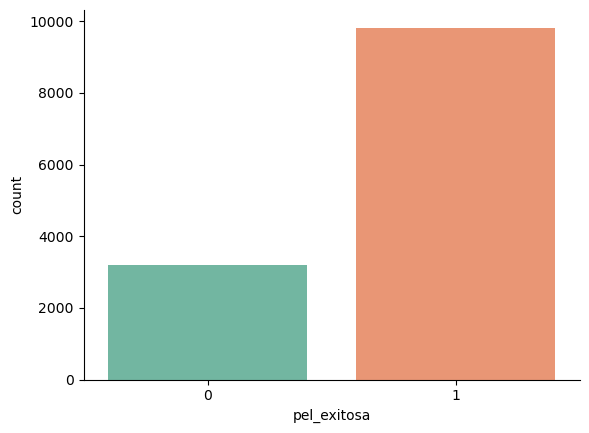

In [208]:
sns.countplot(x=peliculas5['pel_exitosa'], palette='Set2')
sns.despine()

In [209]:
peliculas5['pel_exitosa'].value_counts() / peliculas5['punt_media'].size * 100

1    75.410717
0    24.589283
Name: pel_exitosa, dtype: float64

### Seleccion de target (y) y variables (X)

In [211]:
xc = peliculas5.drop(['punt_media', 'pel_exitosa'], axis=1)

In [212]:
yc = peliculas5['pel_exitosa']

In [213]:
xc, yc = np.array(xc), np.array(yc)

In [214]:
# Separando Train / Test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(xc, yc, test_size=0.2,random_state=42)

### Clasificador kNN

In [215]:
# se importan librerías 
from sklearn.neighbors import KNeighborsClassifier

In [216]:
# metricas
from sklearn.metrics import accuracy_score

In [217]:
knn = KNeighborsClassifier()

In [219]:
# Se entrena el modelo
knn.fit(X_train_c, y_train_c);

ValueError: could not convert string to float: 'Son of Monte Cristo'